###### Check the version of python. It needs to be 3.10.x.

In [21]:
import sys
print(sys.version)

3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:13:41) [MSC v.1929 64 bit (AMD64)]


###### Import all the required modules here.

In [22]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

###### Download or load the given dataset.

In [23]:
DATASET = datasets.cifar10.load_data()
(X_train, y_train), (X_test, y_test) = DATASET

In [4]:
print("Training Features: \t" + str(X_train.shape))
print("Training Variable: \t" + str(y_train.shape))

print("Testing Features: \t" + str(X_test.shape))
print("Testing Variable: \t" + str(y_test.shape))

Training Features: 	(50000, 32, 32, 3)
Training Variable: 	(50000, 1)
Testing Features: 	(10000, 32, 32, 3)
Testing Variable: 	(10000, 1)


###### Split the data set into training and validation

In [5]:
# X_train, X_valid = train_test_split(X_train, test_size=0.2, random_state=42)
# y_train, y_valid = train_test_split(y_train, test_size=0.2, random_state=42)

In [6]:
# print("Updated Training Features: \t" + str(X_train.shape))
# print("Updated Training Variable: \t" + str(y_train.shape))

# print("Validating Features: \t" + str(X_valid.shape))
# print("Validating Variable: \t" + str(y_valid.shape))

In [7]:
# print(f"Dataset: Train: {len(X_train)} - Valid: {len(X_valid)} - Test: {len(X_test)}")

[3]


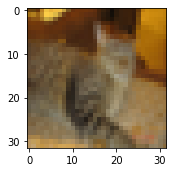

In [8]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
ax.imshow(X_train[314])
print(y_train[314])

###### Hyperparameters

In [9]:
shape = (32, 32, 3)
num_classes = 10
lr = 1e-4
batch_size = 8
epochs = 10
csv_path = "data.csv"

In [24]:
import tensorflow.keras.layers as KL
import tensorflow.keras.models as KM

In [25]:
inputs = KL.Input(shape=(32, 32, 3))

c = KL.Conv2D(32, (3,3), padding="valid", activation=tf.nn.relu)(inputs)
m = KL.MaxPool2D((2,2), (2,2)) (c)

c = KL.Conv2D(64, (3,3), padding="valid", activation=tf.nn.relu)(m)
m = KL.MaxPool2D((2,2), (2,2)) (c)

c = KL.Conv2D(128, (3,3), padding="valid", activation=tf.nn.relu)(m)
m = KL.MaxPool2D((2,2), (2,2)) (c)

f = KL.Flatten() (m)
outputs = KL.Dense(10, activation=tf.nn.softmax) (f)

In [26]:
model = KM.Model(inputs, outputs)

In [27]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_23 (Conv2D)          (None, 4, 4, 128)         7385

In [28]:
epochs = 15
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [29]:
model.fit(X_train, y_train, epochs=5)
test_loss, test_acc = model.evaluate(X_test, y_test)

Epoch 1/5
1563/1563 [==============================] - 22s 14ms/step - loss: 1.8379 - accuracy: 0.3988
Epoch 2/5
1563/1563 [==============================] - 20s 12ms/step - loss: 1.3232 - accuracy: 0.5316
Epoch 3/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.1921 - accuracy: 0.5843
Epoch 4/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1011 - accuracy: 0.6197
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 1.1173 - accuracy: 0.6183


In [30]:
(test_loss, test_acc)

(1.1172735691070557, 0.6183000206947327)

In [17]:
from model import build_unet

In [18]:
umodel = build_unet((32,32,3))
umodel.compile(loss="sparse_categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(lr), metrics=["acc"])

In [19]:
umodel.fit(X_train, y_train, epochs=1)

1563/1563 [==============================] - 488s 311ms/step - loss: 1.4220 - acc: 0.5116


In [20]:
umodel.evaluate(X_test, y_test)

313/313 [==============================] - 23s 73ms/step - loss: 1.1767 - acc: 0.5842


[1.176695704460144, 0.5842000246047974]